<a href="https://colab.research.google.com/github/gianluigilopardo/covid-19/blob/master/Tesina_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Absenteeism at work
Gianluigi Lopardo - Tesina Data Spaces a.a 2019/2020


## 1. Introduction
The dataset used is [Absenteeism at work](http://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work) from UCI Machine learning repository. The aim of this work is to apply **classification** and **clustering** to **predict** absenteeism at work.
The dataset contains 740 entries. Every entry has 21 attributes.
It was created with records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil.

### Attribute Information:

* Individual identification (ID)
* Reason for absence

 Absences attested by the [International Code of Diseases (ICD)](https://www.who.int/classifications/icd/en/) stratified into 21 categories (1 to 21) as follows and 7 categories without ICD (22 to 28):
  1. Certain infectious and parasitic diseases
  2. Neoplasms
  3. Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism
  4. Endocrine, nutritional and metabolic diseases
  5. Mental and behavioural disorders
  6. Diseases of the nervous system
  7. Diseases of the eye and adnexa
  8. Diseases of the ear and mastoid process
  9. Diseases of the circulatory system
  10. Diseases of the respiratory system
  11. Diseases of the digestive system
  12. Diseases of the skin and subcutaneous tissue
  13. Diseases of the musculoskeletal system and connective tissue
  14. Diseases of the genitourinary system
  15. Pregnancy, childbirth and the puerperium
  16. Certain conditions originating in the perinatal period
  17. Congenital malformations, deformations and chromosomal abnormalities
  18. Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified
  19. Injury, poisoning and certain other consequences of external causes
  20. External causes of morbidity and mortality
  21. Factors influencing health status and contact with health services.
  22. patient follow-up 
  23. medical consultation
  24. blood donation 
  25. laboratory examination 
  26. unjustified absence 
  27. physiotherapy 
  28. dental consultation
* Month of absence
* Day of the week: Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6)
* Seasons: summer (1), autumn (2), winter (3), spring (4)
* Transportation expense
* Distance from Residence to Work (kilometers)
* Service time (years)
* Age
* Work load Average/day
* Hit target
* Disciplinary failure: yes=1, no=0
* Education: high school (1), graduate (2), postgraduate (3), master and doctor (4))
* Son (number of children)
* Social drinker: yes=1, no=0
* Social smoker yes=1, no=0
* Pet (number of pet)
* Weight
* Height
* Body mass index
* Absenteeism time in hours (target)

Absenteeism represents for the company the loss of productivity and quality of work. Predicting absenteeism can help companies organize tasks appropriately in order to optimize work and avoid stressful situations for both the company and its employees.

The Analysis is conducted in Python using Colab Notebook, which is a web application that allows you to create an interactive environment that contains live code, visualizations and text. 

References:

* Martiniano, A., Ferreira, R. P., Sassi, R. J., & Affonso, C. (2012). Application of a neuro fuzzy network in prediction of absenteeism at work. In Information Systems and Technologies (CISTI), 7th Iberian Conference on (pp. 1-4). IEEE.
* An Introduction to Statistical Learning with application in R, Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani
* [Performance Metrics for Classification problems in Machine Learning
](https://medium.com/thalus-ai/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b)






## 2. Data preprocessing
After importing data and the Python libraries that we will use, the first step is to preprocess the data: we have to convert the data from one format to another, we will check the missing or invalid values and convert everything in a standardized format on all the data, so that we can easily manage and analyze them.

In [15]:
# IMPORTING PACKAGES

# scientific
import pandas as pd 
import numpy as np 

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# file and data
from google.colab import files
import calendar

# models 
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import sensitivity_score
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')#, category = DeprecationWarning)
warnings.filterwarnings(action = 'ignore', category = FutureWarning)
    
SEED = 42 # I choose a seed for replicability

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [16]:
# IMPORTING DATA
url = "https://raw.githubusercontent.com/gianluigilopardo/dataspaces/master/Absenteeism_at_work.csv"
ds = pd.read_csv(url, sep=',')
print("The dataset has %d rows and %d columns." % ds.shape)

The dataset has 740 rows and 21 columns.
The dataset has 740 rows and 21 columns.


Now that we have the data, let's take a look at it to evaluate how to proceed.

In [17]:
ds.head(10)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
6,10,22,7,6,1,361,52,3,28,239.554,97,0,1,1,1,0,4,80,172,27,8
7,20,23,7,6,1,260,50,11,36,239.554,97,0,1,4,1,0,0,65,168,23,4
8,14,19,7,2,1,155,12,14,34,239.554,97,0,1,2,1,0,0,95,196,25,40
9,1,22,7,2,1,235,11,14,37,239.554,97,0,3,1,0,0,1,88,172,29,8


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
6,10,22,7,6,1,361,52,3,28,239.554,97,0,1,1,1,0,4,80,172,27,8
7,20,23,7,6,1,260,50,11,36,239.554,97,0,1,4,1,0,0,65,168,23,4
8,14,19,7,2,1,155,12,14,34,239.554,97,0,1,2,1,0,0,95,196,25,40
9,1,22,7,2,1,235,11,14,37,239.554,97,0,3,1,0,0,1,88,172,29,8


Before entering the analysis, it is advisable to rename the columns of the dataset, in order to have more easily traceable variables.




In [18]:
# renaming labels
ds = ds.rename(columns = {'Reason for absence': 'reason', 
                          'Month of absence': 'month', 
                          'Day of the week': 'day', 
                          'Transportation expense': 'trans_exp', 
                          'Distance from Residence to Work': 'distance', 
                          'Service time': 'serv_time', 
                          'Work load Average/day ': 'work_load', 
                          'Hit target': 'hit_tg', 
                          'Disciplinary failure': 'disc_fail', 
                          'Social drinker': 'drinker', 
                          'Social smoker': 'smoker', 
                          'Body mass index': 'bmi', 
                          'Absenteeism time in hours': 'abs_hours'})
ds = ds.rename(columns = lambda x: x.lower()) # using lambda function to lowercase labels
ds.head(3)

,id,reason,month,day,seasons,trans_exp,distance,serv_time,age,work_load,hit_tg,disc_fail,education,son,drinker,smoker,pet,weight,height,bmi,abs_hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2


,id,reason,month,day,seasons,trans_exp,distance,serv_time,age,work_load,hit_tg,disc_fail,education,son,drinker,smoker,pet,weight,height,bmi,abs_hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2


Now I check for null values in the dataset:

In [19]:
print("There are " + ("some" if ds.isnull().values.any() else "no")  + " null/missing values in the dataset.")

There are no null/missing values in the dataset.
There are no null/missing values in the dataset.


There are no missing values in the dataset. Now I check for invalid data. 

In [20]:
ds.describe() # summary of data

,id,reason,month,day,seasons,trans_exp,distance,serv_time,age,work_load,hit_tg,disc_fail,education,son,drinker,smoker,pet,weight,height,bmi,abs_hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


,id,reason,month,day,seasons,trans_exp,distance,serv_time,age,work_load,hit_tg,disc_fail,education,son,drinker,smoker,pet,weight,height,bmi,abs_hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


*reason* should take integer values between 1 and 28. However, we see that there are some 0 values.

In [21]:
len(ds[ds['reason'] == 0]) # occurences with 'reason' = 0.

43

43

43 record out of 740 is not a small number. It is necessary to go deeper before decide how to procede.

In [22]:
ds[ds['reason'] == 0].describe() # summary of the subset of data having reason = 0

,id,reason,month,day,seasons,trans_exp,distance,serv_time,age,work_load,hit_tg,disc_fail,education,son,drinker,smoker,pet,weight,height,bmi,abs_hours
count,43.000000,43.0,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.0
mean,18.046512,0.0,7.325581,3.860465,3.162791,246.604651,26.488372,12.627907,39.604651,275.880023,92.441860,0.930233,1.116279,1.348837,0.674419,0.186047,1.046512,83.534884,171.837209,28.325581,0.0
std,11.751299,0.0,3.293001,1.264561,1.044948,79.238080,14.186466,3.450488,7.348921,38.664356,5.010951,0.257770,0.390927,1.066452,0.474137,0.393750,1.812043,14.699123,5.255067,5.405997,0.0
min,1.000000,0.0,0.000000,2.000000,1.000000,118.000000,5.000000,4.000000,28.000000,237.656000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,65.000000,163.000000,21.000000,0.0
25%,7.000000,0.0,5.000000,3.000000,3.000000,225.000000,14.500000,11.000000,34.500000,244.387000,89.500000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,69.000000,168.000000,24.000000,0.0
50%,18.000000,0.0,9.000000,4.000000,3.000000,235.000000,25.000000,13.000000,39.000000,268.519000,93.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,84.000000,170.000000,25.000000,0.0
75%,28.500000,0.0,10.000000,5.000000,4.000000,290.000000,35.500000,14.000000,45.000000,284.031000,96.500000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,98.000000,176.500000,31.500000,0.0
max,36.000000,0.0,11.000000,6.000000,4.000000,388.000000,51.000000,18.000000,53.000000,378.884000,99.000000,1.000000,3.000000,4.000000,1.000000,1.000000,8.000000,106.000000,185.000000,38.000000,0.0


,id,reason,month,day,seasons,trans_exp,distance,serv_time,age,work_load,hit_tg,disc_fail,education,son,drinker,smoker,pet,weight,height,bmi,abs_hours
count,43.000000,43.0,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.0
mean,18.046512,0.0,7.325581,3.860465,3.162791,246.604651,26.488372,12.627907,39.604651,275.880023,92.441860,0.930233,1.116279,1.348837,0.674419,0.186047,1.046512,83.534884,171.837209,28.325581,0.0
std,11.751299,0.0,3.293001,1.264561,1.044948,79.238080,14.186466,3.450488,7.348921,38.664356,5.010951,0.257770,0.390927,1.066452,0.474137,0.393750,1.812043,14.699123,5.255067,5.405997,0.0
min,1.000000,0.0,0.000000,2.000000,1.000000,118.000000,5.000000,4.000000,28.000000,237.656000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,65.000000,163.000000,21.000000,0.0
25%,7.000000,0.0,5.000000,3.000000,3.000000,225.000000,14.500000,11.000000,34.500000,244.387000,89.500000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,69.000000,168.000000,24.000000,0.0
50%,18.000000,0.0,9.000000,4.000000,3.000000,235.000000,25.000000,13.000000,39.000000,268.519000,93.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,84.000000,170.000000,25.000000,0.0
75%,28.500000,0.0,10.000000,5.000000,4.000000,290.000000,35.500000,14.000000,45.000000,284.031000,96.500000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,98.000000,176.500000,31.500000,0.0
max,36.000000,0.0,11.000000,6.000000,4.000000,388.000000,51.000000,18.000000,53.000000,378.884000,99.000000,1.000000,3.000000,4.000000,1.000000,1.000000,8.000000,106.000000,185.000000,38.000000,0.0


I see that all the records having *reason = 0* also have *abs_hours = 0*. These records clearly have no information, so I decide to remove them from the dataset.

In [23]:
ds = ds[ds['reason'] != 0] # removing invalid records.
ds.describe()

,id,reason,month,day,seasons,trans_exp,distance,serv_time,age,work_load,hit_tg,disc_fail,education,son,drinker,smoker,pet,weight,height,bmi,abs_hours
count,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.0,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000
mean,18.015782,20.401722,6.262554,3.918221,2.506456,219.770445,29.824964,12.549498,36.255380,271.219416,94.720230,0.0,1.302726,0.998565,0.560976,0.065997,0.727403,78.757532,172.131994,26.575323,7.351506
std,10.983584,7.162073,3.437653,1.431551,1.105252,65.869224,14.863974,4.438038,6.376202,39.093620,3.653538,0.0,0.685571,1.097933,0.496624,0.248455,1.281055,12.722617,6.082746,4.190214,13.621678
min,1.000000,1.000000,1.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,10.000000,14.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,2.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.0,1.000000,1.000000,1.000000,0.000000,0.000000,80.000000,170.000000,25.000000,3.000000
75%,28.000000,27.000000,9.000000,5.000000,3.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.0,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,0.0,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


,id,reason,month,day,seasons,trans_exp,distance,serv_time,age,work_load,hit_tg,disc_fail,education,son,drinker,smoker,pet,weight,height,bmi,abs_hours
count,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.0,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000
mean,18.015782,20.401722,6.262554,3.918221,2.506456,219.770445,29.824964,12.549498,36.255380,271.219416,94.720230,0.0,1.302726,0.998565,0.560976,0.065997,0.727403,78.757532,172.131994,26.575323,7.351506
std,10.983584,7.162073,3.437653,1.431551,1.105252,65.869224,14.863974,4.438038,6.376202,39.093620,3.653538,0.0,0.685571,1.097933,0.496624,0.248455,1.281055,12.722617,6.082746,4.190214,13.621678
min,1.000000,1.000000,1.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,10.000000,14.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,2.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.0,1.000000,1.000000,1.000000,0.000000,0.000000,80.000000,170.000000,25.000000,3.000000
75%,28.000000,27.000000,9.000000,5.000000,3.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.0,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,0.0,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


There is still at least one 0 value for *abs_hours*. I see if there are more values and I investigate them.

In [24]:
ds[ds['abs_hours'] == 0]

,id,reason,month,day,seasons,trans_exp,distance,serv_time,age,work_load,hit_tg,disc_fail,education,son,drinker,smoker,pet,weight,height,bmi,abs_hours
134,34,27,1,2,2,118,10,10,37,308.593,95,0,1,0,0,0,0,83,172,28,0


,id,reason,month,day,seasons,trans_exp,distance,serv_time,age,work_load,hit_tg,disc_fail,education,son,drinker,smoker,pet,weight,height,bmi,abs_hours
134,34,27,1,2,2,118,10,10,37,308.593,95,0,1,0,0,0,0,83,172,28,0


It is only one record, having *reason* value equal to 27. One idea should be to replace its *abs_hours* value with the *abs_hours* average of the other records having *reason* equal to 27. However, since that value has a grat variance and since it is just a singular value, I decide to remove it.

In [25]:
ds = ds[ds['abs_hours'] > 0]
ds.describe()

,id,reason,month,day,seasons,trans_exp,distance,serv_time,age,work_load,hit_tg,disc_fail,education,son,drinker,smoker,pet,weight,height,bmi,abs_hours
count,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.0,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000
mean,17.992816,20.392241,6.270115,3.920977,2.507184,219.916667,29.853448,12.553161,36.254310,271.165718,94.719828,0.0,1.303161,1.000000,0.561782,0.066092,0.728448,78.751437,172.132184,26.573276,7.362069
std,10.974723,7.162846,3.434321,1.430728,1.105880,65.803295,14.855615,4.440175,6.380725,39.096003,3.656150,0.0,0.685967,1.098069,0.496525,0.248621,1.281679,12.730748,6.087118,4.192879,13.628618
min,1.000000,1.000000,1.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,1.000000
25%,10.000000,14.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,243.659250,93.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,2.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.0,1.000000,1.000000,1.000000,0.000000,0.000000,80.000000,170.000000,25.000000,3.000000
75%,28.000000,27.000000,9.000000,5.000000,3.250000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.0,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,0.0,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


,id,reason,month,day,seasons,trans_exp,distance,serv_time,age,work_load,hit_tg,disc_fail,education,son,drinker,smoker,pet,weight,height,bmi,abs_hours
count,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.0,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000
mean,17.992816,20.392241,6.270115,3.920977,2.507184,219.916667,29.853448,12.553161,36.254310,271.165718,94.719828,0.0,1.303161,1.000000,0.561782,0.066092,0.728448,78.751437,172.132184,26.573276,7.362069
std,10.974723,7.162846,3.434321,1.430728,1.105880,65.803295,14.855615,4.440175,6.380725,39.096003,3.656150,0.0,0.685967,1.098069,0.496525,0.248621,1.281679,12.730748,6.087118,4.192879,13.628618
min,1.000000,1.000000,1.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,1.000000
25%,10.000000,14.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,243.659250,93.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,2.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.0,1.000000,1.000000,1.000000,0.000000,0.000000,80.000000,170.000000,25.000000,3.000000
75%,28.000000,27.000000,9.000000,5.000000,3.250000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.0,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,0.0,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


There is one more categorical attribute to check: *disc_fail*. It is a boolean value.

In [26]:
len(ds[ds['disc_fail'] == 1]) # Check how many records have 1 

0

0

0 out of the 696 records have *disc_fail=1*, everyone has 0. The attribute is so useless, pratically noise. I remove the entire column.

In [0]:
ds = ds.drop(columns = 'disc_fail')

I checked for the zeros and the invalid values among the dataset. 
Now I prepare data for visualization and analysis.

In order to apply **Classification**, I want to divide the values of *Absenteeism in hours*, considering the effective time of absence. I assume a work day of 8 hours and I split the set in 2 labels:
* *hours*: if the absence was for one day or less
* *days*: if the absence was for more than day

In [28]:
# Create label for ABS_HOURS: assume 8 hours day work
#def level(absh):
#  if(absh <= 8):
#    lev = 'hours'
#  elif((absh > 8) and (absh <= 16)):
#    lev = 'day'
#  elif((absh > 16) and (absh <=  40)):
#    lev = 'few_days'
#  elif(absh > 40):
#    lev = 'week'
#  return lev

def level(absh):
  if(absh <= 8):
    lev = 'hours'
  else:
    lev = 'days'
  return lev

ds['abs_lev'] =  ds['abs_hours'].apply(lambda x: level(x)).astype('category')
#ds = ds.drop('abs_hours', axis = 1)
ds.head()

,id,reason,month,day,seasons,trans_exp,distance,serv_time,age,work_load,hit_tg,education,son,drinker,smoker,pet,weight,height,bmi,abs_hours,abs_lev
0,11,26,7,3,1,289,36,13,33,239.554,97,1,2,1,0,1,90,172,30,4,hours
2,3,23,7,4,1,179,51,18,38,239.554,97,1,0,1,0,0,89,170,31,2,hours
3,7,7,7,5,1,279,5,14,39,239.554,97,1,2,1,1,0,68,168,24,4,hours
4,11,23,7,5,1,289,36,13,33,239.554,97,1,2,1,0,1,90,172,30,2,hours
5,3,23,7,6,1,179,51,18,38,239.554,97,1,0,1,0,0,89,170,31,2,hours


,id,reason,month,day,seasons,trans_exp,distance,serv_time,age,work_load,hit_tg,education,son,drinker,smoker,pet,weight,height,bmi,abs_hours,abs_lev
0,11,26,7,3,1,289,36,13,33,239.554,97,1,2,1,0,1,90,172,30,4,hours
2,3,23,7,4,1,179,51,18,38,239.554,97,1,0,1,0,0,89,170,31,2,hours
3,7,7,7,5,1,279,5,14,39,239.554,97,1,2,1,1,0,68,168,24,4,hours
4,11,23,7,5,1,289,36,13,33,239.554,97,1,2,1,0,1,90,172,30,2,hours
5,3,23,7,6,1,179,51,18,38,239.554,97,1,0,1,0,0,89,170,31,2,hours


We see that there are several categorical attributes represented using integer values. In order to manage them, it is opportune to set their type as [Categorical data](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html). 

In [29]:
# Here I will add extended values for categorical data.

# Adding Season names:
season_mapping = {1:'Summer', 2:'Autumn', 3:'Winter', 4:'Spring'}
ds['season_name'] = ds.seasons.map(season_mapping)
ds['season_name'] = ds['season_name'].astype('category')

# Adding Month names abbrevations:
ds['month_name'] =  ds['month'].apply(lambda x: calendar.month_abbr[x])
ds['month_name'] = ds['month_name'].astype('category')

# Adding day names abbrevations:
ds['day_name'] =  ds['day'].apply(lambda x: calendar.day_abbr[x-2])
# calendar 0: Monday, but I want 2: Monday
ds['day_name'] = ds['day_name'].astype('category')

# Adding reasons value:
reason_mapping = {
    1: 'Certain infectious and parasitic diseases',
    2: 'Neoplasms',
    3: 'Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism',
    4: 'Endocrine, nutritional and metabolic diseases',
    5: 'Mental and behavioural disorders',
    6: 'Diseases of the nervous system',
    7: 'Diseases of the eye and adnexa',
    8: 'Diseases of the ear and mastoid process',
    9: 'Diseases of the circulatory system',
    10: 'Diseases of the respiratory system',
    11: 'Diseases of the digestive system',
    12: 'Diseases of the skin and subcutaneous tissue',
    13: 'Diseases of the musculoskeletal system and connective tissue',
    14: 'Diseases of the genitourinary system',
    15: 'Pregnancy, childbirth and the puerperium',
    16: 'Certain conditions originating in the perinatal period',
    17: 'Congenital malformations, deformations and chromosomal abnormalities',
    18: 'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified',
    19: 'Injury, poisoning and certain other consequences of external causes',
    20: 'External causes of morbidity and mortality',
    21: 'Factors influencing health status and contact with health services',
    22: 'Patient follow-up',
    23: 'Medical consultation',
    24: 'Blood donation',
    25: 'Laboratory examination',
    26: 'Unjustified absence',
    27: 'Physiotherapy',
    28: 'Dental consultation'
}
ds['reason_text'] = ds['reason'].map(reason_mapping)
ds['reason_text'] = ds['reason_text'].astype('category')

# Adding Education:
education_mapping = {
    1: '1. High School',
    2: '2. Graduate',
    3: '3. Post Graduate',
    4: '4. Master & Doctor'
}
ds['education_detail'] = ds['education'].map(education_mapping)
ds['education_detail'] = ds['education_detail'].astype('category')

# smoker and drinker are boolean
ds['smoker'] = ds['smoker'].astype('bool')
ds['drinker'] = ds['drinker'].astype('bool')

# Now ds contains categorical data twice.
# I drop the old columns, but before I keep save of everything
# in ds_explore: it will be used for data exploration and we will 
# choose the better format each way.

ds_explore = ds.copy()
ds = ds.drop(columns = {'id','reason','month','day','seasons','education'})

# I check the firsts rows:
ds_explore.head()

,id,reason,month,day,seasons,trans_exp,distance,serv_time,age,work_load,hit_tg,education,son,drinker,smoker,pet,weight,height,bmi,abs_hours,abs_lev,season_name,month_name,day_name,reason_text,education_detail
0,11,26,7,3,1,289,36,13,33,239.554,97,1,2,True,False,1,90,172,30,4,hours,Summer,Jul,Tue,Unjustified absence,1. High School
2,3,23,7,4,1,179,51,18,38,239.554,97,1,0,True,False,0,89,170,31,2,hours,Summer,Jul,Wed,Medical consultation,1. High School
3,7,7,7,5,1,279,5,14,39,239.554,97,1,2,True,True,0,68,168,24,4,hours,Summer,Jul,Thu,Diseases of the eye and adnexa,1. High School
4,11,23,7,5,1,289,36,13,33,239.554,97,1,2,True,False,1,90,172,30,2,hours,Summer,Jul,Thu,Medical consultation,1. High School
5,3,23,7,6,1,179,51,18,38,239.554,97,1,0,True,False,0,89,170,31,2,hours,Summer,Jul,Fri,Medical consultation,1. High School


## 3. Exploratory Data Analysis



Sometimes simple plotting can help understanding how to proceed. We analyze the distribution of *Absenteeism time in hours* and then we try to undestrand the relationships between the other features. 

Text(0, 0.5, 'Frequency')

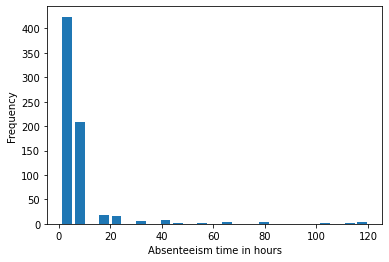

In [30]:
N = len(ds_explore)

# Plotting absenteeism hours 
bins = 25
fig, ax = plt.subplots()
ax.hist(ds_explore['abs_hours'], bins, rwidth=0.8)
ax.set_xlabel('Absenteeism time in hours')
ax.set_ylabel('Frequency')

Absenteeism time is highly skewed due to presence of outliers. 

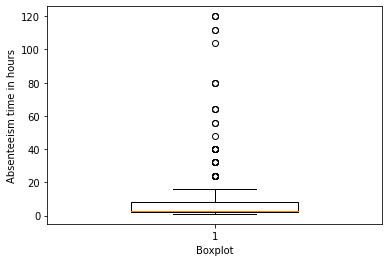

In [31]:
# boxplot of Absenteeism time. 
plt.boxplot(ds_explore['abs_hours'], widths = 0.5)
plt.ylabel('Absenteeism time in hours')
plt.xlabel('Boxplot')
plt.show()

Clearly, in *Abseteeism time in hours* there is a great presence of outliers. It seems there are few observations particularly unusual.

Text(0, 0.5, 'Frequency')

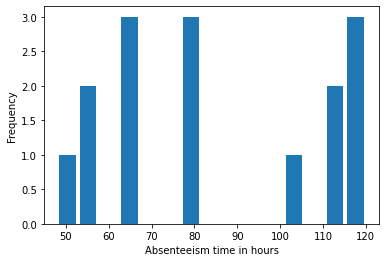

In [32]:
# boxplot of Absenteeism time for values grater than a week (40 hours). 
bins = 15
fig, ax = plt.subplots()
out = ds_explore[ds_explore['abs_hours'] > 40]
ax.hist(out['abs_hours'], bins, rwidth = 0.8)
ax.set_xlabel('Absenteeism time in hours')
ax.set_ylabel('Frequency')

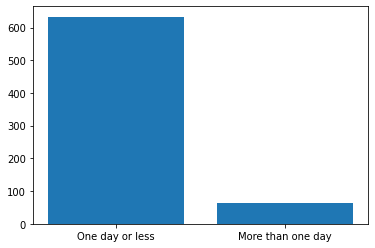

In [33]:
#Plotting passing student
day_more = pd.value_counts(ds['abs_hours'].values > 8, sort = False)[1]
day_less = N - day_more
x = np.array(['One day or less', 'More than one day'])
y = np.array([day_less, day_more])
plt.bar(x, y)
plt.show()

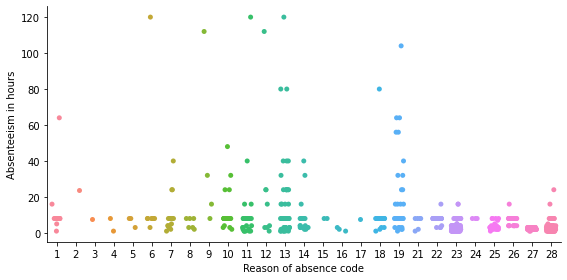

In [34]:
# Plot of Absenteeism time in hours with Reason for absence. 
# To verify the outliers in each reason codes. 
sns.catplot(x = 'reason', y = 'abs_hours', 
            data = ds_explore,
            height = 4,
            aspect = 2,
            jitter = '0.25',
            ).set_axis_labels("Reason of absence code", 'Absenteeism in hours')

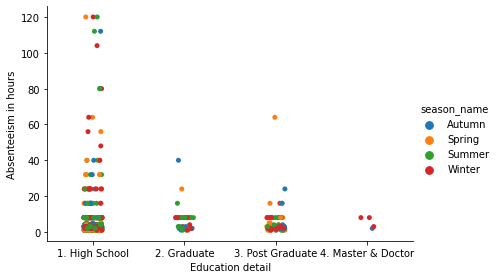

In [35]:
sns.catplot(x = 'education_detail', y = 'abs_hours', 
            hue = 'season_name',
            data = ds_explore,
            height = 4,
            aspect = 1.5).set_axis_labels("Education detail", 'Absenteeism in hours')

The number of records in the dataset is heavily skewed towards not abnormal absenteism, this could make the algorithms employed skewed as well. I can solve this issue with **oversampling** later.



Text(0.5, 1.0, 'Correlation Heatmap')

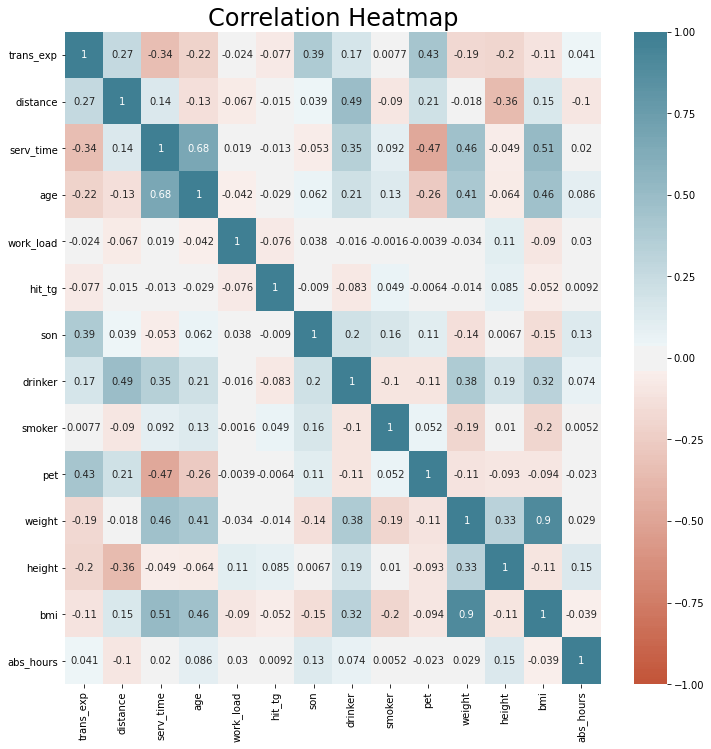

In [36]:
#Correlation matrix 
corr = ds.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr, annot = True, 
            vmin = -1, vmax = 1, center = 0,
            cmap = sns.diverging_palette(20, 220, n = 200))
plt.title('Correlation Heatmap', fontsize = 24)


Some features are being highlighted in the heatmap. Let's have a look to the more intresting. However, strong correlation among *bmi*, *height* and *weight* and between *distance* and *transport expences* may suggest to remove some feature.

1. Strong positive correlation between *Age* and *Service time*.
2. Positive correlation between *Service time* and *bmi* (and so *Weight*).
3. Negative correlation between *Transport expences* and *Service time*.
4. Negative correlation between *Service time* and number of *Pet*.

We notice that no feature have strong negative or positive correlation with *Absenteeism time in hours*. We have to go deeper. What is more, clearly in the heatap they are not considered the categorical data.



In [0]:
ds = ds.drop(columns = 'abs_hours') # I use abs_lev
X = ds.drop(columns = 'abs_lev')
y = ds['abs_lev']

## 4. Dimensionality and Oversamling

In [64]:
X.head()

,trans_exp,distance,serv_time,age,work_load,hit_tg,son,drinker,smoker,pet,weight,height,bmi,season_name,month_name,day_name,reason_text,education_detail
0,289,36,13,33,239.554,97,2,1,0,1,90,172,30,2,5,3,26,0
2,179,51,18,38,239.554,97,0,1,0,0,89,170,31,2,5,4,19,0
3,279,5,14,39,239.554,97,2,1,1,0,68,168,24,2,5,2,9,0
4,289,36,13,33,239.554,97,2,1,0,1,90,172,30,2,5,2,19,0
5,179,51,18,38,239.554,97,0,1,0,0,89,170,31,2,5,0,19,0


### 4.1 Principal Component Analysis
[Principal component analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis) is a statistical procedure that uses an orthogonal transformation to reduce data dimensionality.
This occurs through a linear transformation of the variables that projects the original ones into a new Cartesian system in which the new variable with the greatest variance is projected on the first axis, the new variable, the second for the size of the variance, on the second axis and so on.

The dataset has 11 numerical features and 7 categorical feature. Among the categorical feature, 2 of them are binary and 5 are nominal.

There is something to do in order to work with the nominal values. The original dataset applies **label encoding**: nominal values are encoded as integer positive values. 

The problem is that numerical values implies an order, but clearly we can't say that *Summer* is bigger than *Winter* or that *Diseases of the nervous system* is smaller than *Diseases of the respiratory system*. This tecnique can be useful in when applied to values that can be ordedered or have some sort of heriarchy, for example *Education* can be seen as the *Level of education* and so an order could make sense. Anyway, this is not the case for most of the nominal features here.

To overcame this problem, the most commonly technique used is **one hot encoding**. Each category value is converted into a new column: we assign 1 to the corresponding value and 0 to everything else. 

Appling it here, this implies adding 49 new columns: 5 for *Day of the week*, 4 for *Season*, 12 for *Month* and 28 for *Reason of absence*. Complexively, by removing *ID* and the 4 nominal columns, we have now 63 columns. In general, this can't be ignored and made straigthforward. 

However, I will using **Principal Component Analysis** in order to reduce dimensions, so for now I keep all the columns.


In [60]:
X_pca = X.copy()

# Adding the new columns
X_pca = pd.concat([X_pca,pd.get_dummies(X_pca['reason_text'], prefix = 'reason')], axis=1)
X_pca = pd.concat([X_pca,pd.get_dummies(X_pca['month_name'], prefix = 'month')], axis=1)
X_pca = pd.concat([X_pca,pd.get_dummies(X_pca['day_name'], prefix = 'day')], axis=1)
X_pca = pd.concat([X_pca,pd.get_dummies(X_pca['season_name'], prefix = 'season')], axis=1)
X_pca = pd.concat([X_pca,pd.get_dummies(X_pca['education_detail'], prefix = 'education')], axis=1)

# Removing the old nominal variables
#X_pca.drop(['id'],axis=1, inplace=True) # I exclude ID from the analysis
X_pca.drop(['reason_text'],axis=1, inplace=True)
X_pca.drop(['month_name'],axis=1, inplace=True)
X_pca.drop(['day_name'],axis=1, inplace=True)
X_pca.drop(['season_name'],axis=1, inplace=True)
X_pca.drop(['education_detail'],axis=1, inplace=True)

X_pca.head(3)

,trans_exp,distance,serv_time,age,work_load,hit_tg,son,drinker,smoker,pet,weight,height,bmi,reason_0,reason_1,reason_2,reason_3,reason_4,reason_5,reason_6,reason_7,reason_8,reason_9,reason_10,reason_11,reason_12,reason_13,reason_14,reason_15,reason_16,reason_17,reason_18,reason_19,reason_20,reason_21,reason_22,reason_23,reason_24,reason_25,reason_26,month_0,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,day_0,day_1,day_2,day_3,day_4,season_0,season_1,season_2,season_3,education_0,education_1,education_2,education_3
0,289,36,13,33,239.554,97,2,1,0,1,90,172,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
2,179,51,18,38,239.554,97,0,1,0,0,89,170,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
3,279,5,14,39,239.554,97,2,1,1,0,68,168,24,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0


In [61]:
#Normalize:
X_pca_norm = (X_pca-X_pca.mean())/X_pca.std()

X_pca_norm.head()
print("There are " + ("some" if X_pca_norm.isnull().values.any() else "no")  + " null/missing values in the dataset.")

There are no null/missing values in the dataset.


Text(0, 0.5, 'Variance explained')

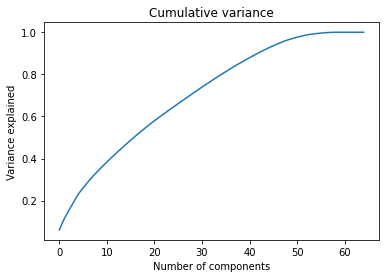

In [62]:
# calculate the principal components
X_pca = PCA().fit(X_pca_norm)

cumvar = np.cumsum(X_pca.explained_variance_ratio_)

#Plotting cumulative variance
plt.plot(cumvar)
plt.title('Cumulative variance')
plt.xlabel('Number of components')
plt.ylabel('Variance explained')

In [65]:
cumvar[18]

0.543941797006344

The starting dataset was made of 18 features. Since same if the categorical feature was made of a lot of levels, noi we have 63 principal components.
In order to take advantage from PCA, we should use at most the firsts 18 components. However, we see that the first 18 principal components capture only about 55% of the variance. This is not helpful: we do not use data from PCA. 

In [42]:
n_used = 18
X_pca = np.dot(X_pca_norm.values, X_pca.components_[:n_used,:].T)
X_pca = pd.DataFrame(X_pca, columns=["PC#%d" % (x + 1) for x in range(n_used)])
X_pca.head()

,PC#1,PC#2,PC#3,PC#4,PC#5,PC#6,PC#7,PC#8,PC#9,PC#10,PC#11,PC#12,PC#13,PC#14,PC#15,PC#16,PC#17,PC#18
0,-1.771825,1.546078,0.806377,2.220865,1.567007,0.053277,-1.609360,-0.484281,-1.106812,-2.355954,-0.486754,-0.685897,-1.536574,1.273321,-1.666868,0.638025,-0.910163,0.243254
1,-2.403717,0.301885,0.481924,0.927148,1.990529,-1.128864,-0.698523,-1.378723,0.565905,-0.488530,1.676160,0.115570,-1.789422,1.063215,-0.186238,-0.823448,-0.358220,0.186518
2,0.480856,1.333206,1.518392,1.833400,1.707296,1.448112,0.845257,-0.276456,1.416009,-0.380369,-0.198952,-1.355839,0.003531,1.219146,0.312123,-2.320716,-1.528359,1.231570
3,-1.359976,1.598797,0.461464,1.879197,1.468774,-0.371842,-0.909602,-0.984328,-0.375251,0.500390,-0.307837,0.438831,-0.757727,2.058849,0.378390,-1.073191,-1.039793,0.961747
4,-2.293710,0.527833,0.446409,1.261056,1.834835,-1.108484,0.579772,-1.457528,-0.334021,-1.226170,0.587699,0.760935,-0.918521,1.274759,-0.274290,-0.331720,-1.145458,-0.111195


### 4.2 Oversampling
As discussed before, in the classification setting the dataset is heavily skewed towards low level of absenteeism. We can solve this by oversamplig. 

There are three common techniques to do this:

1. The simplest is **Random oversampling**: it simply generates randomly new samples in the classes which are under-represented. 

2. **SMOTE** (Synthetic Minority Oversampling Technique): take a sample from the dataset, and consider its k nearest neighbors (in feature space). To create a synthetic data point, take the vector between one of those $k$ neighbors, and the current data point. Multiply this vector by a random number $x$ which lies between $0$, and $1$. Add this to the current data point to create the new, synthetic data point.

3. **ADASYN** (ADAptive SYNthetic sampling approach) algorithm, builds on the methodology of SMOTE, by shifting the importance of the classification boundary to those minority classes which are difficult. ADASYN uses a weighted distribution for different minority class examples according to their level of difficulty in learning, where more synthetic data is generated for minority class examples that are harder to learn.


In [0]:
# GENERATING NEW DATASET WITH RANDOM OVERSAMPLING, SMOTE and ADASYN OVERSAMPLING

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column. 
X['season_name'] = label_encoder.fit_transform(X['season_name']) 
X['month_name'] = label_encoder.fit_transform(X['month_name']) 
X['day_name'] = label_encoder.fit_transform(X['day_name']) 
X['reason_text'] = label_encoder.fit_transform(X['reason_text']) 
X['reason_text'] = label_encoder.fit_transform(X['reason_text']) 
X['education_detail'] = label_encoder.fit_transform(X['education_detail'])
X['smoker'] = label_encoder.fit_transform(X['smoker'])
X['drinker'] = label_encoder.fit_transform(X['drinker'])
ylabel = label_encoder.fit_transform(y) 

ros = RandomOverSampler(1.0)
#X_ROS, y_ROS = ros.fit_resample(X, ylabel)
X_SMOTE, y_SMOTE = SMOTE().fit_resample(X, ylabel)
X_ADASYN, y_ADASYN = ADASYN().fit_resample(X, ylabel)

## 5. Classification Models
Classification is the problem of identifying to which of a set of categories (sub-populations) a new observation belongs, on the basis of a training set of data containing observations (or instances) whose category membership is known.




Here I apply the most commons classification algorithms and I will compare their performance using diffent metrics:

Let: $TP$ = True positives, $TN$ = True negative, $FP$ = False positive, $FN$ = False negative.

1. **Accuracy** = $\frac{TP + TN}{TP+TN + FP + FN} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}$

2. **Precision** = $\frac{\text{TP}}{\text{TP + FP}}$

3. **Sensitivity** = $\frac{\text{TP}}{\text{TP + FN}}$

4. **Specificity** = $\frac{\text{TN}}{\text{TN + FP}}$

5. **F1 Score** = $2 \cdot \frac{Precision \cdot Sensitivity}{Precision + Sensitivity} $

Now I split the sets in training and test.
I use 70% of data as training set and 30% for tests.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, ylabel, test_size = 0.3, random_state = SEED)
#X_train_ROS, X_test_ROS, y_train_ROS, y_test_ROS = train_test_split(X_ROS, y_ROS, test_size = 0.3, random_state = SEED)
X_train_SMOTE, X_test_SMOTE, y_train_SMOTE, y_test_SMOTE = train_test_split(X_SMOTE, y_SMOTE, test_size = 0.3, random_state = SEED)
X_train_ADASYN, X_test_ADASYN, y_train_ADASYN, y_test_ADASYN = train_test_split(X_ADASYN, y_ADASYN, test_size = 0.3, random_state = SEED)

I have to choose which of my datasets to use for classification. I decide to evaluate all of them using the random forest classifier and then I select the one which performs better.



In [72]:
## Random forest with max depth = 4 of every tree, with 100 trees 
class_forest = RandomForestClassifier(n_estimators = 100, max_depth = 4, random_state = SEED)

#Simple dataset
class_forest.fit(X_train, y_train)
simple_pred = class_forest.predict(X_test)

#Random oversampler
#class_forest.fit(X_train_ROS, y_train_ROS)
#random_over_pred = class_forest.predict(X_test_ROS)

#SMOTE
class_forest.fit(X_train_SMOTE, y_train_SMOTE)
SMOTE_pred = class_forest.predict(X_test_SMOTE)

#ADASYN 
class_forest.fit(X_train_ADASYN, y_train_ADASYN)
ADASYN_pred = class_forest.predict(X_test_ADASYN)

#Evaluating performance 

#Simple data_set metrics: 
simple_pred_accuracy = accuracy_score(y_test, simple_pred)
simple_pred_precision = precision_score(y_test, simple_pred, average = 'weighted')
simple_pred_sensitivity = recall_score(y_test, simple_pred, average = 'weighted')
simple_pred_f1 = f1_score(y_test, simple_pred, average = 'weighted')

# Random oversampling metrics:
#rnd_sampler_accuracy = accuracy_score(y_test_ROS, random_over_pred)
#rnd_sampler_precision = precision_score(y_test_ROS,random_over_pred)
#rnd_sampler_sensitivity = recall_score(y_test_ROS,random_over_pred)
#rnd_sampler_f1 = f1_score(y_test_ROS,random_over_pred)

#SMOTE metrics: 
SMOTE_accuracy = accuracy_score(y_test_SMOTE, SMOTE_pred)
SMOTE_precision = precision_score(y_test_SMOTE, SMOTE_pred, average = 'weighted')
SMOTE_sensitivity = recall_score(y_test_SMOTE, SMOTE_pred, average = 'weighted')
SMOTE_f1 = f1_score(y_test_SMOTE, SMOTE_pred, average = 'weighted')

#ADASYN metrics:
ADASYN_accuracy = accuracy_score(y_test_ADASYN, ADASYN_pred)
ADASYN_precision = precision_score(y_test_ADASYN, ADASYN_pred, average = 'weighted')
ADASYN_sensitivity = recall_score(y_test_ADASYN, ADASYN_pred, average = 'weighted')
ADASYN_f1 = f1_score(y_test_ADASYN, ADASYN_pred, average = 'weighted')

# I put everything into a table:
metrics = pd.DataFrame(columns=["Accuracy", "Precision", "Sensitivity", "F1 Score"])
metrics.loc["Simple Dataset"] = [simple_pred_accuracy,simple_pred_precision,simple_pred_sensitivity,simple_pred_f1]
#metrics.loc["Rnd oversampling"] = [rnd_sampler_accuracy,rnd_sampler_precision,rnd_sampler_sensitivity,rnd_sampler_f1]
metrics.loc["SMOTE"] = [SMOTE_accuracy,SMOTE_precision,SMOTE_sensitivity,SMOTE_f1]
metrics.loc["ADASYN"] = [ADASYN_accuracy,ADASYN_precision,ADASYN_sensitivity,ADASYN_f1]

#Let's see the output:
metrics

,Accuracy,Precision,Sensitivity,F1 Score
Simple Dataset,0.873684,0.874225,0.873684,0.873737
SMOTE,0.873684,0.874225,0.873684,0.873737
ADASYN,0.902632,0.903802,0.902632,0.902711


The best seems to be the ADASYN set: I will use it.


In [0]:
X_train = X_train_ADASYN
y_train = y_train_ADASYN
X_test = X_test_ADASYN
y_test = y_test_ADASYN

In [0]:
classification_metrics = pd.DataFrame(columns=["Accuracy", "Precision", "Sensitivity", "F1 Score"])

## 5.1 Logitistic regression

In [0]:
logistic = LogisticRegression(C=1.0,random_state=0,solver='lbfgs').fit(X_train, y_train)
logistic_predict = logistic.predict(X_test)

#metrics:
logi_acc = accuracy_score(logistic_predict, y_test)
logi_preci = precision_score(logistic_predict, y_test, average = 'weighted')
logi_sensitivity = recall_score(logistic_predict, y_test, average = 'weighted')
logi_f1 = f1_score(logistic_predict, y_test, average = 'weighted')

class_models_metrics.loc["Logistic regression"] = [logi_acc,logi_preci,logi_sensitivity,logi_f1]

## 5.2 Decision Tree


In [0]:
# Decision TREE: Entropy
tree_Entropy = tree.DecisionTreeClassifier(criterion = 'entropy', random_state = SEED)

tree_Entropy.fit(X_train, y_train)
tree_Entropy_pred = tree_Entropy.predict(X_test)

#metrics
tree_acc = accuracy_score(tree_Entropy_pred, y_test)
tree_preci = precision_score(tree_Entropy_pred, y_test, average = 'weighted')
tree_sensitivity = recall_score(tree_Entropy_pred, y_test, average = 'weighted')
tree_f1 = f1_score(tree_Entropy_pred, y_test, average = 'weighted')

classification_metrics.loc["Tree Entropy"] = [tree_acc, tree_preci, tree_sensitivity, tree_f1]

In [0]:
# Decision TREE: Gini
tree_Gini = tree.DecisionTreeClassifier(criterion = 'gini', random_state = SEED)

tree_Gini.fit(X_train, y_train)
tree_Gini_pred = tree_Gini.predict(X_test)

#metrics
tree_acc = accuracy_score(tree_Gini_pred, y_test)
tree_preci = precision_score(tree_Gini_pred, y_test, average = 'weighted')
tree_sensitivity = recall_score(tree_Gini_pred, y_test, average = 'weighted')
tree_f1 = f1_score(tree_Gini_pred, y_test, average = 'weighted')

classification_metrics.loc["Tree Gini"] = [tree_acc, tree_preci, tree_sensitivity, tree_f1]

## 5.3 Random forest

In [0]:
# Random forest with max depth = 2 of every tree, with 100 trees and entropy criterion
forest_Entropy = RandomForestClassifier(criterion = 'entropy', n_estimators = 100, max_depth = 4, random_state = SEED)
forest_Entropy.fit(X_train, y_train)
forest_Entropy_pred = forest_Entropy.predict(X_test)

#metrics
forest_acc = accuracy_score(forest_Entropy_pred, y_test)
forest_preci = precision_score(forest_Entropy_pred, y_test, average = 'weighted')
forest_sensitivity = recall_score(forest_Entropy_pred, y_test, average = 'weighted')
forest_f1 = f1_score(forest_Entropy_pred, y_test, average = 'weighted')

classification_metrics.loc["Forest Entropy"] = [forest_acc,forest_preci,forest_sensitivity,forest_f1]

In [0]:
# Random forest with max depth = 2 of every tree, with 100 trees and Gini criterion
forest_Gini = RandomForestClassifier(criterion = 'gini', n_estimators = 100, max_depth = 4, random_state = SEED)
forest_Gini.fit(X_train, y_train)
forest_Gini_pred = forest_Entropy.predict(X_test)

#metrics
forest_acc = accuracy_score(forest_Gini_pred, y_test)
forest_preci = precision_score(forest_Gini_pred, y_test, average = 'weighted')
forest_sensitivity = recall_score(forest_Entropy_pred, y_test, average = 'weighted')
forest_f1 = f1_score(forest_Gini_pred, y_test, average = 'weighted')

classification_metrics.loc["Forest Gini"] = [forest_acc,forest_preci,forest_sensitivity,forest_f1]

## 5.4 K Nearest neighbours

In [0]:
neigh = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)
neigh_predict = neigh.predict(X_test)

#metrics:
neigh_acc = accuracy_score(neigh_predict, y_test)
neigh_preci = precision_score(neigh_predict, y_test, average = 'weighted')
neigh_sensitivity = recall_score(neigh_predict, y_test, average = 'weighted')
neigh_f1 = f1_score(neigh_predict, y_test, average = 'weighted')

classification_metrics.loc["KNN"] = [neigh_acc,neigh_preci,neigh_sensitivity,neigh_f1]

## 5.5 Support vector machine

In [0]:
#gamma hyperparameter of the model with RBF, gamma = 'auto' is suggested and corresponds to 1/n_features
svm_mod = svm.SVC(random_state = SEED, gamma='auto')
svm_mod.fit(X_train,y_train)
svm_mod_predict = svm_mod.predict(X_test)

#metrics:
svm_acc = accuracy_score(svm_mod_predict, y_test)
svm_preci = precision_score(svm_mod_predict, y_test, average = 'weighted')
svm_sensitivity = recall_score(svm_mod_predict, y_test, average = 'weighted')
svm_f1 = f1_score(svm_mod_predict, y_test, average = 'weighted')

classification_metrics.loc["SVM"] = [svm_acc,svm_preci,svm_sensitivity,svm_f1]

In [0]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()#random_state = SEED, gamma='auto')
bayes.fit(X_train, y_train)
bayes_pred = bayes.predict(X_test)

#metrics:
bayes_acc = accuracy_score(bayes_pred, y_test)
bayes_preci = precision_score(bayes_pred, y_test, average = 'weighted')
bayes_sensitivity = recall_score(bayes_pred, y_test, average = 'weighted')
bayes_f1 = f1_score(bayes_pred, y_test, average = 'weighted')

classification_metrics.loc["Naive Bayes"] = [bayes_acc,bayes_preci,bayes_sensitivity,bayes_f1]

## 5.6 Model Comparison

In [85]:
classification_metrics

,Accuracy,Precision,Sensitivity,F1 Score
Tree Entropy,0.907895,0.907937,0.907895,0.907909
Tree Gini,0.905263,0.905370,0.905263,0.905216
Forest Entropy,0.892105,0.894737,0.892105,0.892027
Forest Gini,0.892105,0.894737,0.892105,0.892027
KNN,0.834211,0.860071,0.834211,0.835403
SVM,0.886842,0.896393,0.886842,0.887777
Naive Bayes,0.781579,0.784796,0.781579,0.782273
